# **Import Dataset**

In [51]:
#data import
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import os
from google.colab import drive
import datetime

#authorization
drive.mount('/content/drive')
# !ls "/content/drive/My Drive/Colab Notebooks/input"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
df =  pd.read_csv('/content/drive/My Drive/Colab Notebooks/input/prices-split-adjusted.csv', index_col=0)
df.head()

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


#**Data Adjusting**

In [53]:
#adding one coloum that moves the "close"
df["adj close"] = df.close
#drop close column
df.drop(["close"], 1, inplace=True)
df.head()

,symbol,open,low,high,volume,adj close
date,,,,,,
2016-01-05,WLTW,123.430000,122.309998,126.250000,2163600.0,125.839996
2016-01-06,WLTW,125.239998,119.940002,125.540001,2386400.0,119.980003
2016-01-07,WLTW,116.379997,114.930000,119.739998,2489500.0,114.949997
2016-01-08,WLTW,115.480003,113.500000,117.440002,2006300.0,116.620003
2016-01-11,WLTW,117.010002,114.089996,117.330002,1408600.0,114.970001


In [54]:
df2 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/input/fundamentals.csv")
df2.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Current Ratio,Deferred Asset Charges,Deferred Liability Charges,Depreciation,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets,Interest Expense,Inventory,Investments,Liabilities,Long-Term Debt,Long-Term Investments,Minority Interest,Misc. Stocks,Net Borrowings,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Net Income,Net Income Adjustments,Net Income Applicable to Common Shareholders,Net Income-Cont. Operations,Net Receivables,Non-Recurring Items,Operating Income,Operating Margin,Other Assets,Other Current Assets,Other Current Liabilities,Other Equity,Other Financing Activities,Other Investing Activities,Other Liabilities,Other Operating Activities,Other Operating Items,Pre-Tax Margin,Pre-Tax ROE,Profit Margin,Quick Ratio,Research and Development,Retained Earnings,Sale and Purchase of Stock,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,1.049900e+10,78.0,0.000000e+00,223000000.0,1.001000e+09,-1.813000e+09,-2.445000e+09,0.0,0.0,1.340200e+10,0.000000e+00,58.0,1.435600e+10,-5.690000e+08,8.690000e+08,632000000.0,5.800000e+08,3.060000e+08,4.730000e+08,7.116000e+09,0.0,0.0,0.0,-1.020000e+09,197000000.0,1.285000e+09,4.830000e+08,-1.571000e+09,-1.876000e+09,2.050000e+09,-1.876000e+09,-4.084000e+09,1.124000e+09,3.860000e+08,1.480000e+08,1.0,2.167000e+09,6.260000e+08,4.524000e+09,-2.980000e+09,1.509000e+09,11000000.0,1.514700e+10,-141000000.0,8.450000e+08,10.0,31.0,8.0,72.0,0.0,-9.462000e+09,0.000000e+00,1.297700e+10,1.419000e+09,3.412000e+09,2.351000e+10,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,1.101900e+10,104.0,0.000000e+00,935000000.0,1.020000e+09,-1.324000e+09,-2.180000e+09,0.0,0.0,1.925900e+10,4.086000e+09,59.0,1.572400e+10,-3.460000e+08,2.311000e+09,856000000.0,1.012000e+09,-1.181000e+09,-2.350000e+08,1.535300e+10,0.0,0.0,0.0,2.208000e+09,660000000.0,6.750000e+08,3.799000e+09,-3.814000e+09,-1.834000e+09,1.873000e+09,-1.834000e+09,-4.489000e+09,1.560000e+09,5.590000e+08,1.399000e+09,5.0,2.299000e+09,1.465000e+09,7.385000e+09,-2.032000e+09,1.711000e+09,481000000.0,1.491500e+10,-56000000.0,8.530000e+08,8.0,80.0,7.0,96.0,0.0,-1.129600e+10,0.000000e+00,1.291300e+10,1.446000e+09,8.111000e+09,4.227800e+10,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7000000.0,1.562000e+10,88.0,0.000000e+00,829000000.0,1.342000e+09,4.099000e+09,3.212000e+09,0.0,0.0,2.308400e+10,4.091000e+09,63.0,2.703000e+10,3.300000e+08,2.240000e+09,887000000.0,1.004000e+09,1.799000e+09,-1.026000e+09,1.604300e+10,0.0,0.0,0.0,1.700000e+08,-146000000.0,3.080000e+09,-3.150000e+08,-2.911000e+09,2.882000e+09,5.420000e+08,2.882000e+09,2.882000e+09,1.771000e+09,8.000000e+08,4.249000e+09,10.0,2.060000e+09,8.980000e+08,7.059000e+09,-4.559000e+09,8.170000e+08,601000000.0,1.092800e+10,-500000000.0,1.295000e+09,8.0,159.0,7.0,80.0,0.0,-8.562000e+09,-1.052000e+09,2.068600e+10,1.677000e+09,6.309000e+09,4.322

In [55]:
#extract all symbols from the list(company name)
df['symbol'].unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [56]:
#in our project one company will be chosen
# data = df[df.symbol == "NFLX"]
df = df[df['symbol']=='NFLX']
df.head()
# pd.set_option('mode.chained_assignment', None)

,symbol,open,low,high,volume,adj close
date,,,,,,
2010-01-04,NFLX,7.931428,7.565714,7.961429,17239600.0,7.640000
2010-01-05,NFLX,7.652857,7.258572,7.657143,23753100.0,7.358572
2010-01-06,NFLX,7.361429,7.197143,7.672857,23290400.0,7.617143
2010-01-07,NFLX,7.731429,7.462857,7.757143,9955400.0,7.485714
2010-01-08,NFLX,7.498571,7.465714,7.742857,8180900.0,7.614286


In [57]:
#check null values if there is one should be dropped
df.isnull().sum()

symbol       0
open         0
low          0
high         0
volume       0
adj close    0
dtype: int64

In [58]:
#then we can drop the smybol column now
df.drop(['symbol'],1,inplace=True)
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,open,low,high,volume,adj close
date,,,,,
2010-01-04,7.931428,7.565714,7.961429,17239600.0,7.640000
2010-01-05,7.652857,7.258572,7.657143,23753100.0,7.358572
2010-01-06,7.361429,7.197143,7.672857,23290400.0,7.617143
2010-01-07,7.731429,7.462857,7.757143,9955400.0,7.485714
2010-01-08,7.498571,7.465714,7.742857,8180900.0,7.614286


#**Data Normalization**

In [59]:
from sklearn import preprocessing

#Using build in method to normalize the data

# scaler = StandardScaler()
# X = scaler.fit_transform(data.iloc[:,:])
# data.head()
def normalize_data(df):
    min_max_scaler = preprocessing.MinMaxScaler() 
    df['open'] = min_max_scaler.fit_transform(df.open.values.reshape(-1,1))
    df['high'] = min_max_scaler.fit_transform(df.high.values.reshape(-1,1))
    df['low'] = min_max_scaler.fit_transform(df.low.values.reshape(-1,1))
    df['volume'] = min_max_scaler.fit_transform(df.volume.values.reshape(-1,1))
    df['adj close'] = min_max_scaler.fit_transform(df['adj close'].values.reshape(-1,1))
    return df 
df =normalize_data(df)
df.head() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

,open,low,high,volume,adj close
date,,,,,
2010-01-04,0.007820,0.005310,0.006209,0.049768,0.005015
2010-01-05,0.005577,0.002739,0.003795,0.070516,0.002744
2010-01-06,0.003231,0.002224,0.003920,0.069042,0.004831
2010-01-07,0.006210,0.004449,0.004589,0.026564,0.003770
2010-01-08,0.004335,0.004473,0.004475,0.020911,0.004808


#**Training set and Testing set**

In [60]:
def load_data(stock, seq_len):
    amount_of_features = len(stock.columns)
    # print(amount_of_features)
    data = stock.values
    sequence_length = seq_len + 1 #index starting from 0, memory seq
    result = []

    for index in range(len(data) - sequence_length): #maximum date = latest date - sequence length 
        result.append(data[index: index + sequence_length]) #index: index + memory days
    
    result = np.array(result)
    row = round(0.8 * result.shape[0]) #80% split
    train = result[:int(row), :]#all rows, all colummns here int is used in the bracket cus in the obove step row is multiplied by 0.9

    x_train = train[:, :-1] #all rows, all columns except last one 
    y_train = train[:, -1][:, -1]

    x_test = result[int(row):, :-1] #all rows, all but last one column
    y_test = result[int(row):, -1][:, -1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))

    return [x_train, y_train, x_test, y_test]

#**Build Model**

In [61]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

X_train, y_train, X_test, y_test = load_data(df, 5)
# print(X_train[0], y_train[0])
# print(X_train.shape)
#use build in model LSTM
model = Sequential()

#First layer, 256 Neurons
model.add(LSTM(256, input_shape=X_train.shape[1:], return_sequences=True))
#avoid Overfitting need dropout
d = 0.2
model.add(Dropout(d))

#Second layer, 256 Neurons
model.add(LSTM(256, return_sequences=False))
model.add(Dropout(d))

# model.add(LSTM(32, activation='relu', return_sequences=False))
# model.add(Dropout(d))

#Third layer, 32 Neurons
model.add(Dense(32, activation='relu'))

#output layer one output we need
model.add(Dense(1, activation='linear'))

#compile the model use adam optimazer, MeanSquaredError as loss, and matrics mean absolute error
model.compile(optimizer='adam', loss='mse', metrics='mae')


model.fit(X_train, y_train, batch_size=512, epochs=100, validation_data=(X_test,y_test))

Epoch 1/100
3/3 [==============================] - 4s 569ms/step - loss: 0.0717 - mae: 0.1997 - val_loss: 0.2007 - val_mae: 0.4430
Epoch 2/100
3/3 [==============================] - 1s 228ms/step - loss: 0.0113 - mae: 0.0765 - val_loss: 0.0390 - val_mae: 0.1919
Epoch 3/100
3/3 [==============================] - 1s 226ms/step - loss: 0.0151 - mae: 0.1173 - val_loss: 0.0018 - val_mae: 0.0309
Epoch 4/100
3/3 [==============================] - 1s 230ms/step - loss: 0.0032 - mae: 0.0445 - val_loss: 0.0609 - val_mae: 0.2417
Epoch 5/100
3/3 [==============================] - 1s 230ms/step - loss: 0.0078 - mae: 0.0619 - val_loss: 0.0398 - val_mae: 0.1940
Epoch 6/100
3/3 [==============================] - 1s 236ms/step - loss: 0.0032 - mae: 0.0381 - val_loss: 0.0018 - val_mae: 0.0306
Epoch 7/100
3/3 [==============================] - 1s 233ms/step - loss: 0.0016 - mae: 0.0328 - val_loss: 0.0162 - val_mae: 0.1199
Epoch 8/100
3/3 [==============================] - 1s 226ms/step - loss: 0.0026 - m

#**Graph**

In [62]:
import matplotlib.pyplot as plt
import math

diff=[]
ratio=[]
p = model.predict(X_test)
# print(p.shape)
#for each data index in test data 
for u in range(len(y_test)):
    #pr = predictation day u 
    pr = p[u][0]
    #(y_test day u / pr) - 1 
    ratio.append((y_test[u]/pr)-1)
    diff.append(abs(y_test[u]-pr))
    # print(u, y_test[u], pr, (y_test[u]/pr)-1, abs(y_test[u]- pr))
    # Last day prediction
    # print(p[-1]) 
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/input/prices-split-adjusted.csv",index_col = 0)
df["adj close"] = df.close # Moving close to the last column
df.drop(['close'], 1, inplace=True) # Moving close to the last column
df = df[df.symbol == 'NFLX']
df.drop(['symbol'],1,inplace=True)

# Bug fixed at here, please update the denormalize function to this one
def denormalize(df, normalized_value): 
    df = df['adj close'].values.reshape(-1,1)
    normalized_value = normalized_value.reshape(-1,1)
    
    #return df.shape, p.shape
    min_max_scaler = preprocessing.MinMaxScaler()
    a = min_max_scaler.fit_transform(df)
    new = min_max_scaler.inverse_transform(normalized_value)
    return new

newp = denormalize(df, p)
newy_test = denormalize(df, y_test)

def model_score(model, X_train, y_train, X_test, y_test):
    trainScore = model.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

    testScore = model.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    return trainScore[0], testScore[0]


model_score(model, X_train, y_train, X_test, y_test)

Train Score: 0.00027 MSE (0.02 RMSE)
Test Score: 0.00188 MSE (0.04 RMSE)


(0.00026970659382641315, 0.0018801575060933828)

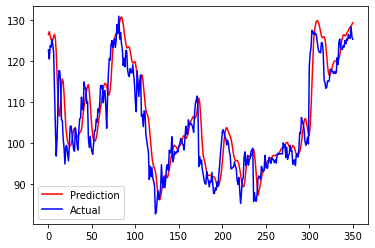

In [63]:
plt.plot(newp,color='red', label='Prediction')
plt.plot(newy_test,color='blue', label='Actual')
plt.legend(loc='best')
plt.show()